In [ ]:
import numpy as np
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/content/drive/MyDrive/Camera Clicks_256_256')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['Disease_Preprocessing data', 'Healthy_Preprocessing data']
Types of classes labels found:  2


In [ ]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('/content/drive/MyDrive/Camera Clicks_256_256' + '/' +item)
 print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))

['Soy (1060).JPG', 'Soy (106).JPG', 'Soy (1061).JPG', 'Soy (1062).JPG', 'Soy (1064).JPG', 'Soy (1063).JPG', 'Soy (1066).JPG', 'Soy (1065).JPG', 'Soy (1068).JPG', 'Soy (1067).JPG', 'Soy (1069).JPG', 'Soy (1070).JPG', 'Soy (1071).JPG', 'Soy (1072).JPG', 'Soy (1074).JPG', 'Soy (1073).JPG', 'Soy (1075).JPG', 'Soy (1076).JPG', 'Soy (1078).JPG', 'Soy (1077).JPG', 'Soy (1080).JPG', 'Soy (1079).JPG', 'Soy (1082).JPG', 'Soy (1081).JPG', 'Soy (1083).JPG', 'Soy (1084).JPG', 'Soy (1085).JPG', 'Soy (1086).JPG', 'Soy (1087).JPG', 'Soy (1088).JPG', 'Soy (1089).JPG', 'Soy (109).JPG', 'Soy (1090).JPG', 'Soy (1092).JPG', 'Soy (1091).JPG', 'Soy (1094).JPG', 'Soy (1093).JPG', 'Soy (1095).JPG', 'Soy (1096).JPG', 'Soy (1097).JPG', 'Soy (1098).JPG', 'Soy (1099).JPG', 'Soy (110).JPG', 'Soy (11).JPG', 'Soy (1101).JPG', 'Soy (1100).JPG', 'Soy (1102).JPG', 'Soy (1104).JPG', 'Soy (1105).JPG', 'Soy (1106).JPG', 'Soy (1107).JPG', 'Soy (1108).JPG', 'Soy (1109).JPG', 'Soy (111).JPG', 'Soy (1110).JPG', 'Soy (1111).JPG

In [ ]:
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

                       Labels  \
0  Disease_Preprocessing data   
1  Disease_Preprocessing data   
2  Disease_Preprocessing data   
3  Disease_Preprocessing data   
4  Disease_Preprocessing data   

                                               image  
0  dataset_path/Disease_Preprocessing data/Soy (1...  
1  dataset_path/Disease_Preprocessing data/Soy (1...  
2  dataset_path/Disease_Preprocessing data/Soy (1...  
3  dataset_path/Disease_Preprocessing data/Soy (1...  
4  dataset_path/Disease_Preprocessing data/Soy (1...  
                          Labels  \
1189  Healthy_Preprocessing data   
1190  Healthy_Preprocessing data   
1191  Healthy_Preprocessing data   
1192  Healthy_Preprocessing data   
1193  Healthy_Preprocessing data   

                                                  image  
1189  dataset_path/Healthy_Preprocessing data/Soy (9...  
1190  dataset_path/Healthy_Preprocessing data/Soy (7...  
1191  dataset_path/Healthy_Preprocessing data/Soy (9...  
1192  dataset_path/Hea

In [ ]:
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  1194
Disease_Preprocessing data    1055
Healthy_Preprocessing data     139
Name: Labels, dtype: int64


In [ ]:
import cv2
path = '/content/drive/MyDrive/Camera Clicks_256_256/'
dataset_path = os.listdir('/content/drive/MyDrive/Camera Clicks_256_256')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [ ]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(1194, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['Disease_Preprocessing data' 'Disease_Preprocessing data'
 'Disease_Preprocessing data' ... 'Healthy_Preprocessing data'
 'Healthy_Preprocessing data' 'Healthy_Preprocessing data']
[0 0 0 ... 1 1 1]


In [ ]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1134, 224, 224, 3)
(1134, 2)
(60, 224, 224, 3)
(60, 2)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 2
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [ ]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=30, verbose=2)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 2)                 4052133   
 )                                                               
                                                                 
Total params: 4052133 (15.46 MB)
Trainable params: 4010110 (15.30 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________
Epoch 1/30
36/36 - 64s - loss: 1.1360 - accuracy: 0.8060 - 64s/epoch - 2s/step
Epoch 2/30
36/36 - 9s - loss: 0.4529 - accuracy: 0.8466 - 9s/epoch - 247ms/step
Epoch 3/30
36/36 - 9s - loss: 0.2529 - accuracy: 0.8898 - 9s/epoch - 249ms/step
Epoch 4/30
36/36 - 9s - loss: 0.2057 - accuracy: 0.9039 - 9s/epoch - 253ms/step
Epoch 5/30
36/36 - 9s - loss

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

2/2 [==============================] - 4s 910ms/step - loss: 0.2035 - accuracy: 0.9000
Loss = 0.20348408818244934
Test Accuracy = 0.8999999761581421


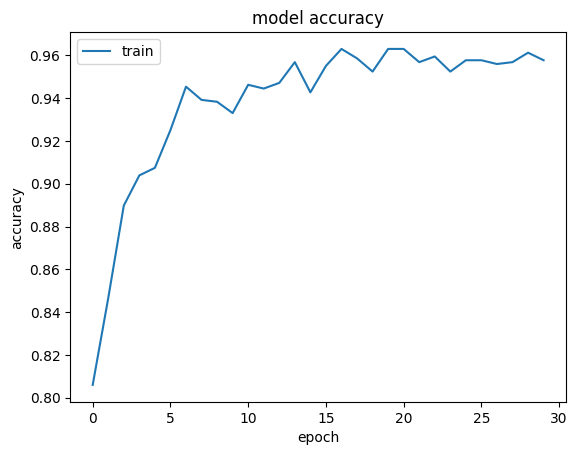

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)